# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

##### The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import roc_curve, precision_score, recall_score, accuracy_score, make_scorer, confusion_matrix, f1_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression 
from sklearn.feature_selection import SequentialFeatureSelector,SelectFromModel,RFE, RFECV

import warnings
warnings.filterwarnings('ignore')
!pip install category_encoders

from category_encoders import TargetEncoder

images_path = "./images"
if not os.path.isdir(images_path):
    os.mkdir("./images") 

In [7]:
#For running on Google Colab
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True) # Mount Google Drive to access files
#df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/module17/data/bank-additional-full.csv', sep = ';')


## NOTE: Running the full dataset my laptop get overheated and shuts down :(, so using the provided small dataset. 

In [9]:
#df = pd.read_csv('data/bank-additional-full.csv', sep = ';')
df = pd.read_csv('data/bank-additional.csv', sep = ';')

In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [12]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

### Global set of variables
    * globalloglevel - For controlling verbosity of logs in Notebook
    * scoring_metric - 'precision' - Used for scoring all classifiers, replace with 'roc_auc' for 'accuracy' for other objective
    * prediction = False, Based on duration feature(11), for benkmarking classifiers we set to false to drop 'duration', If we set to True
                    results for test will be very different

In [16]:
globalloglevel = 1
scoring_metric='accuracy'
prediction = False

def log(message, loglevel=1):
    if loglevel == globalloglevel:
        print(message)

def getFigTitle(fig, title):
    fig = fig + 1
    return f'Fig{ fig} : {title}', fig

#Globals
palette = ["#fee090", "#fdae61", "#4575b4", "#313695", "#e0f3f8", "#abd9e9", "#d73027", "#a50026"]
images_path = "./images/"
if not os.path.isdir(images_path):
    os.mkdir("./images") 

figcounter = 0



In [17]:
'''
Functions to generate visualization
'''

def generate_qualitative_plots(data, feature, targetfeature, compared_feature, feature_desc, figcounter):

    fig, axs = plt.subplots(2, 2, figsize=(18,12))
    sns.histplot(data=data, x=feature.name, kde=True, ax=axs[0,0], bins=10)
    mean = np.mean(feature)
    median = np.median(feature)
    stddev = np.std(feature)

 #   axs[0,0].axline(mean, color='r', linestyle='--', label='Mean')
 #   axs[0,0].axline(median, color='g', linestyle='-', label='Median')
 #   axs[0,0].axline(stddev, color='g', linestyle='-', label='StdDev')

    corr_data = pd.crosstab(feature, targetfeature.sort_values()).corr()
    sns.heatmap(corr_data, annot=True, ax=axs[0,1])

    sns.boxplot(x=targetfeature.name, y=feature.name, data=data, ax=axs[1,0])
    axs[1,0].tick_params(axis='x', rotation=30)

    sns.scatterplot(y=feature.name, x=compared_feature.name, hue=targetfeature.name, data=data, ax=axs[1,1], alpha=0.8, edgecolors='none')
#    axs[1,1].set_legend(title = 'Target')
    axs[1,1].tick_params(axis='x', rotation=30)
    

    title, figcounter = getFigTitle(figcounter, f'Feature {feature_desc} Breakdown')
    fig.suptitle(title)
    plt.savefig(images_path+title)
    plt.show()
    return figcounter

def generate_categorical_plots(data, feature, targetfeature, qualitive_feature, feature_desc, figcounter):
    fig, axs = plt.subplots(2, 2, figsize=(18,12))
    sns.countplot(data=data, x=feature.name, hue=targetfeature.name, ax=axs[0,0], palette="rainbow")
    
    axs[0,0].set_title(f"Count Plot for categories in : {feature_desc}")
    axs[0,0].grid(visible=True)
    axs[0,0].set_xlabel(feature_desc)
    axs[0,0].tick_params(axis='x', rotation=30)
#    axs[0,0].set_ylabel("Counts")

    pie_counts = feature.value_counts()
    axs[0,1].pie(pie_counts, autopct='%1.0f%%')    
    axs[0,1].legend(labels=pie_counts.index)
    axs[0,1].set_title(f"Pie Distribution for categories in : {feature_desc}")
    
#    sns.barplot(x=feature.name, y=qualitive_feature.name, 
#                hue=targetfeature.name, data=data, palette="rainbow", ax=axs[0,1])
#    axs[0,1].set_ylabel("Counts")
#    axs[0,1].tick_params(axis='x', rotation=30)


    sns.boxplot(x=feature.name, y=qualitive_feature.name, 
                hue=targetfeature.name, data=data, palette="coolwarm", ax=axs[1,0])
    axs[1,0].tick_params(axis='x', rotation=30)
    axs[1,0].set_title(f"Box Plot for categories in : {feature_desc}")
    axs[1,0].grid(visible=True)

    sns.violinplot(x=feature.name, y=qualitive_feature.name, data=data,
                   ax=axs[1,1])
    axs[1,1].tick_params(axis='x', rotation=30)
    axs[1,1].set_title(f"Violin Plot for categories distribution in : {feature_desc}")
    axs[1,1].grid(visible=True)
    

    title, figcounter = getFigTitle(figcounter, f'Feature {feature_desc} Breakdown')
    fig.suptitle(title)
    plt.savefig(images_path+title)
    plt.show()
    return figcounter


In [18]:
df[df.y == 'yes']['job'].value_counts()

job
admin.           133
technician        80
blue-collar       61
retired           38
services          35
management        30
unemployed        19
student           19
self-employed     13
housemaid         11
entrepreneur       8
unknown            4
Name: count, dtype: int64

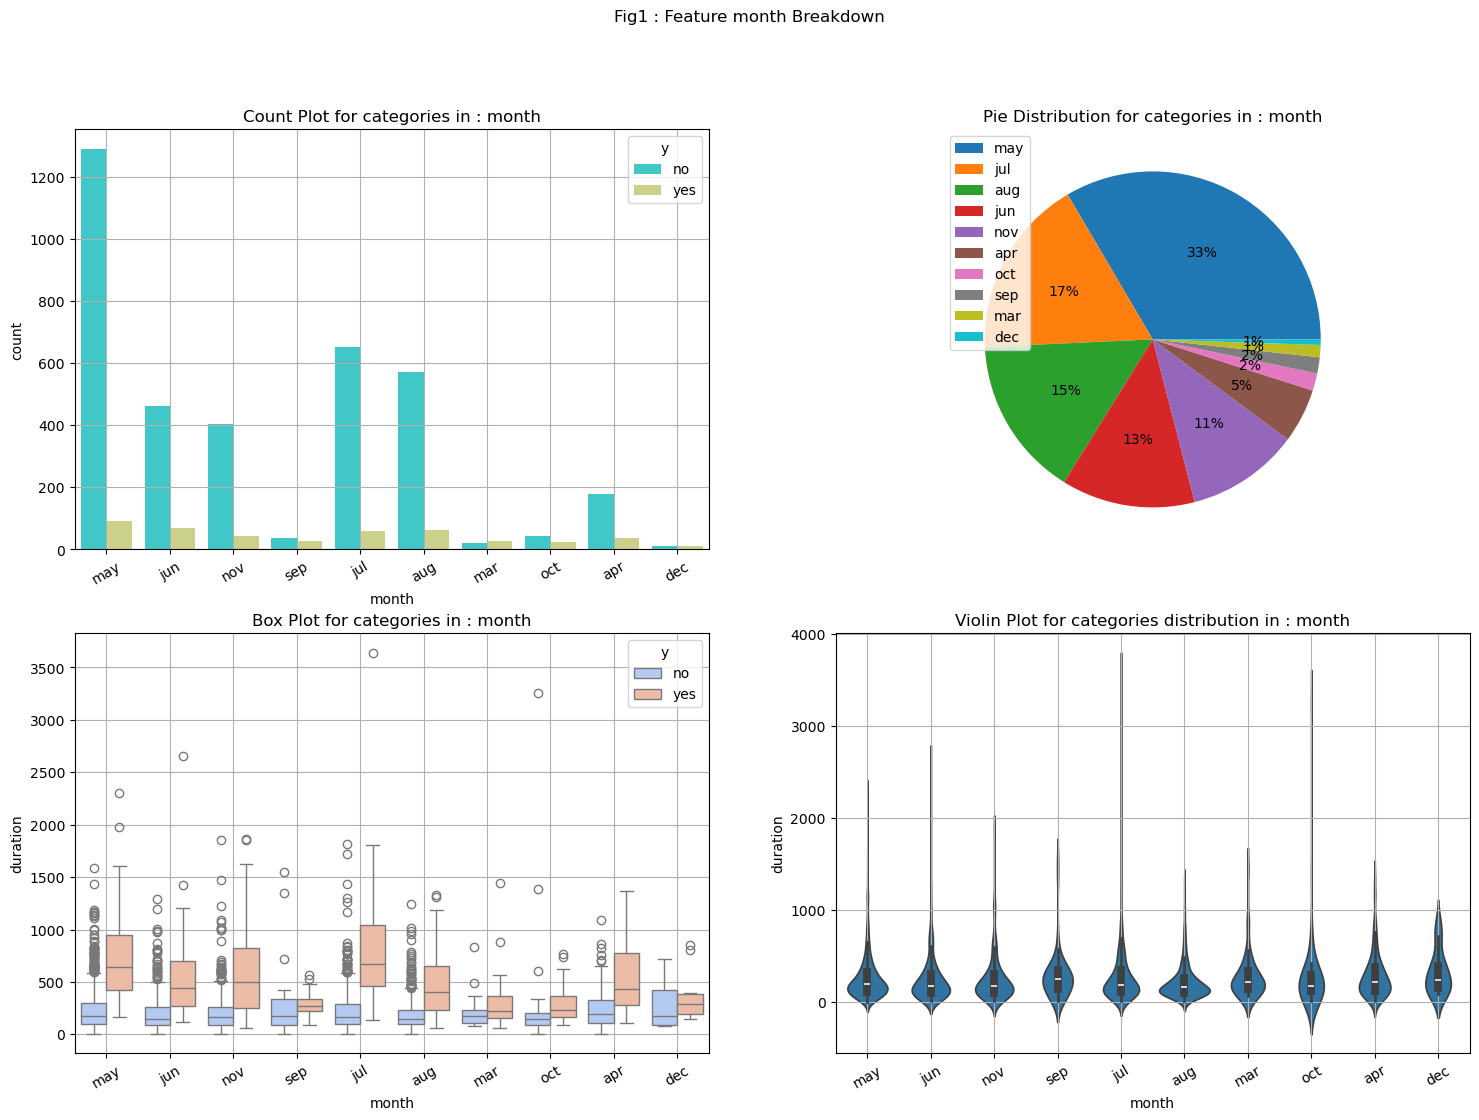

In [19]:
figcounter = generate_categorical_plots(df, df['month'], df.y, df.duration, 'month', figcounter)

#### Observation
* Best Month
  1) may
  2) june
  3) aug


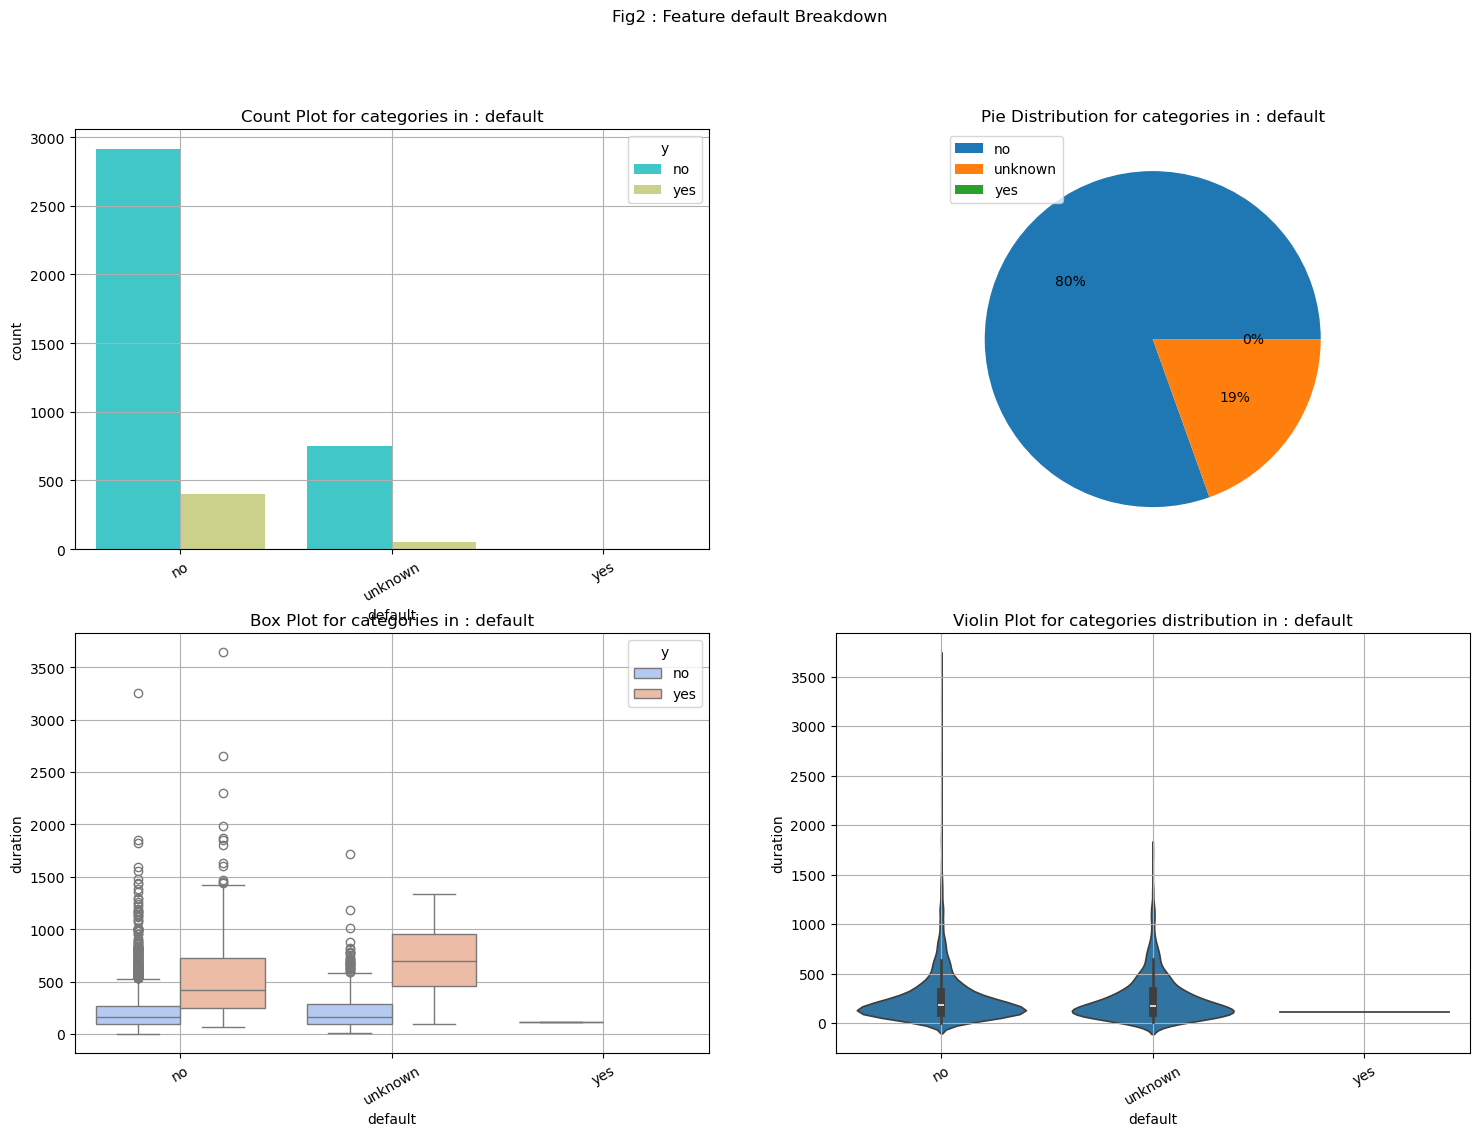

In [21]:
figcounter = generate_categorical_plots(df, df['default'], df.y, df.duration, 'default', figcounter)

#### Observation
* customers who have defaulted
  * Have shortest calls
  * Do not subscribe to loan deposit

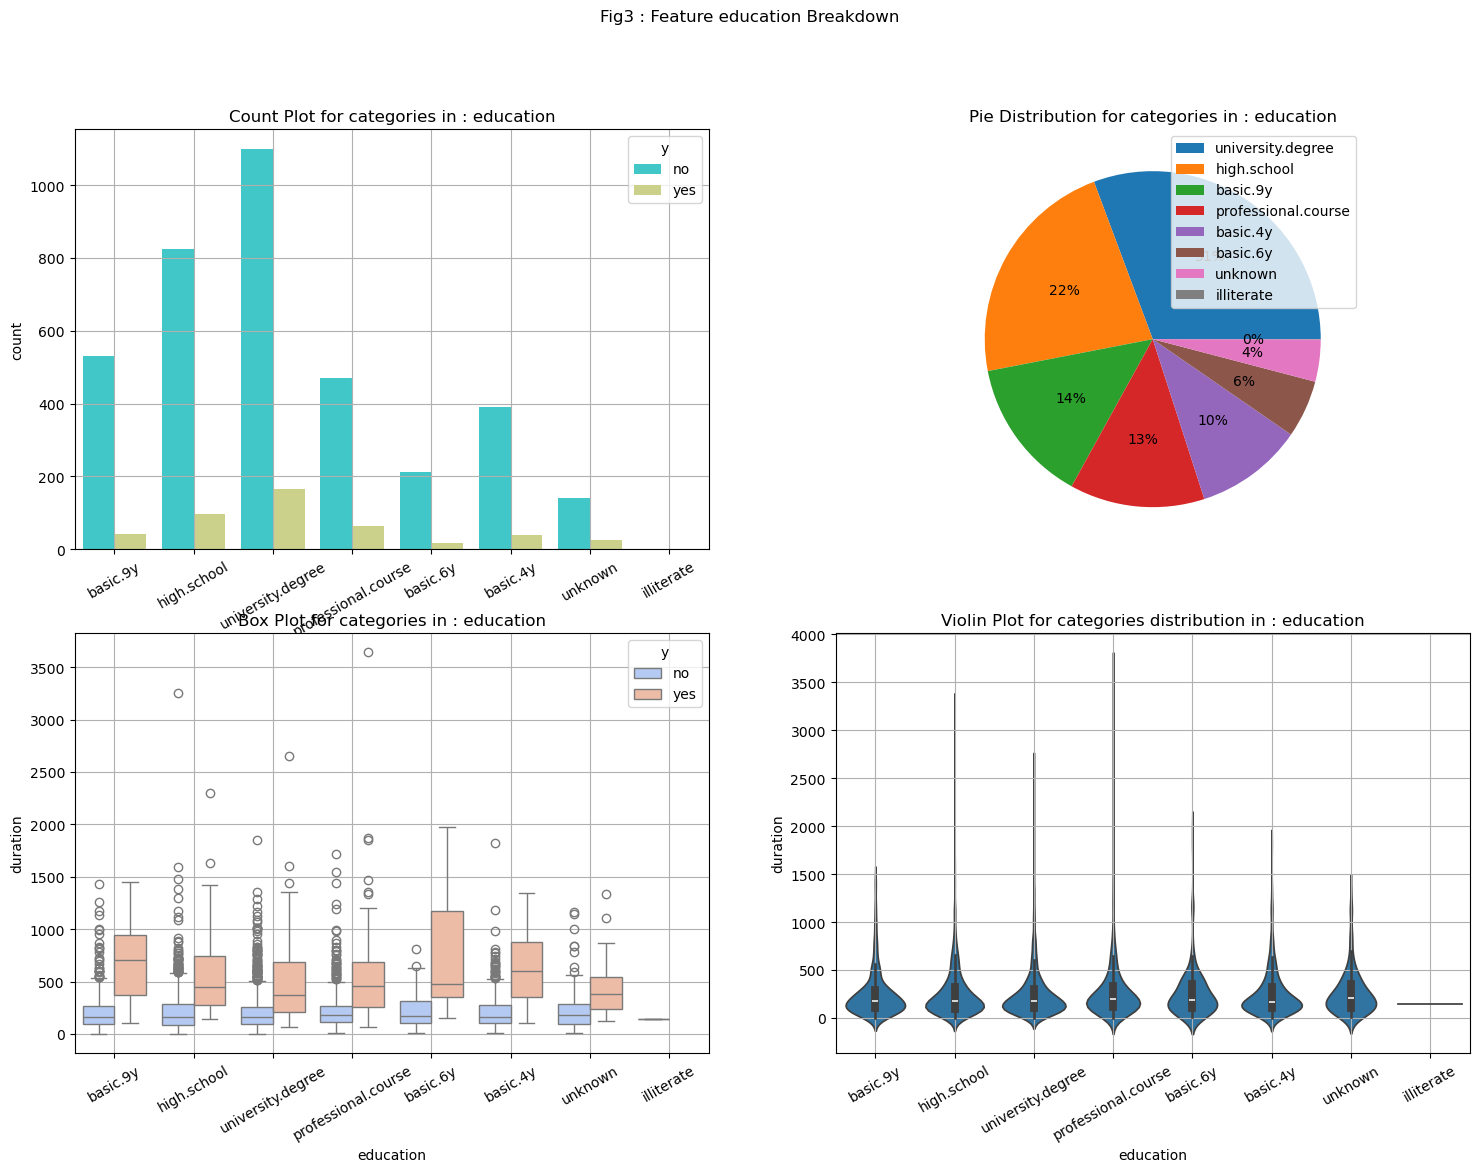

In [23]:
figcounter = generate_categorical_plots(df, df['education'], df.y, df.duration, 'education', figcounter)

#### Observation
* Education wise, who subscribe 
  1) university.degree
  2) high.school
  3) professional.course


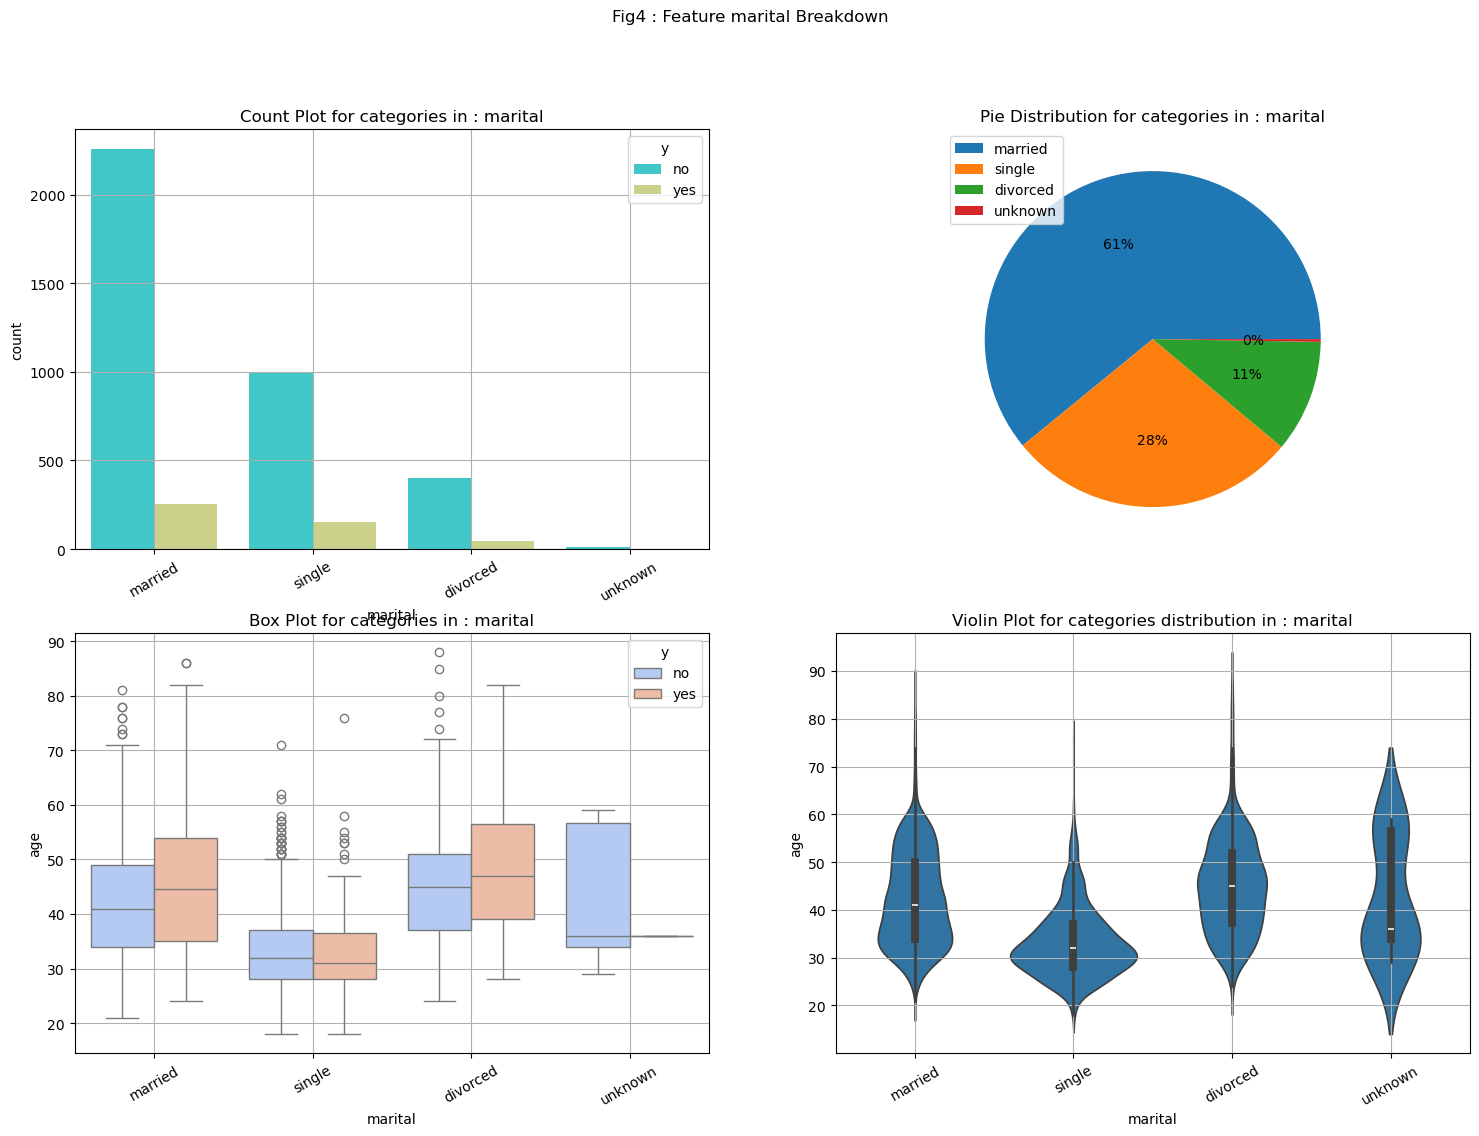

In [25]:
figcounter = generate_categorical_plots(df, df.marital, df.y, df.age, 'marital', figcounter)

#### Observation
* Education wise, who subscribe 
  1) university.degree
  2) high.school
  3) professional.course


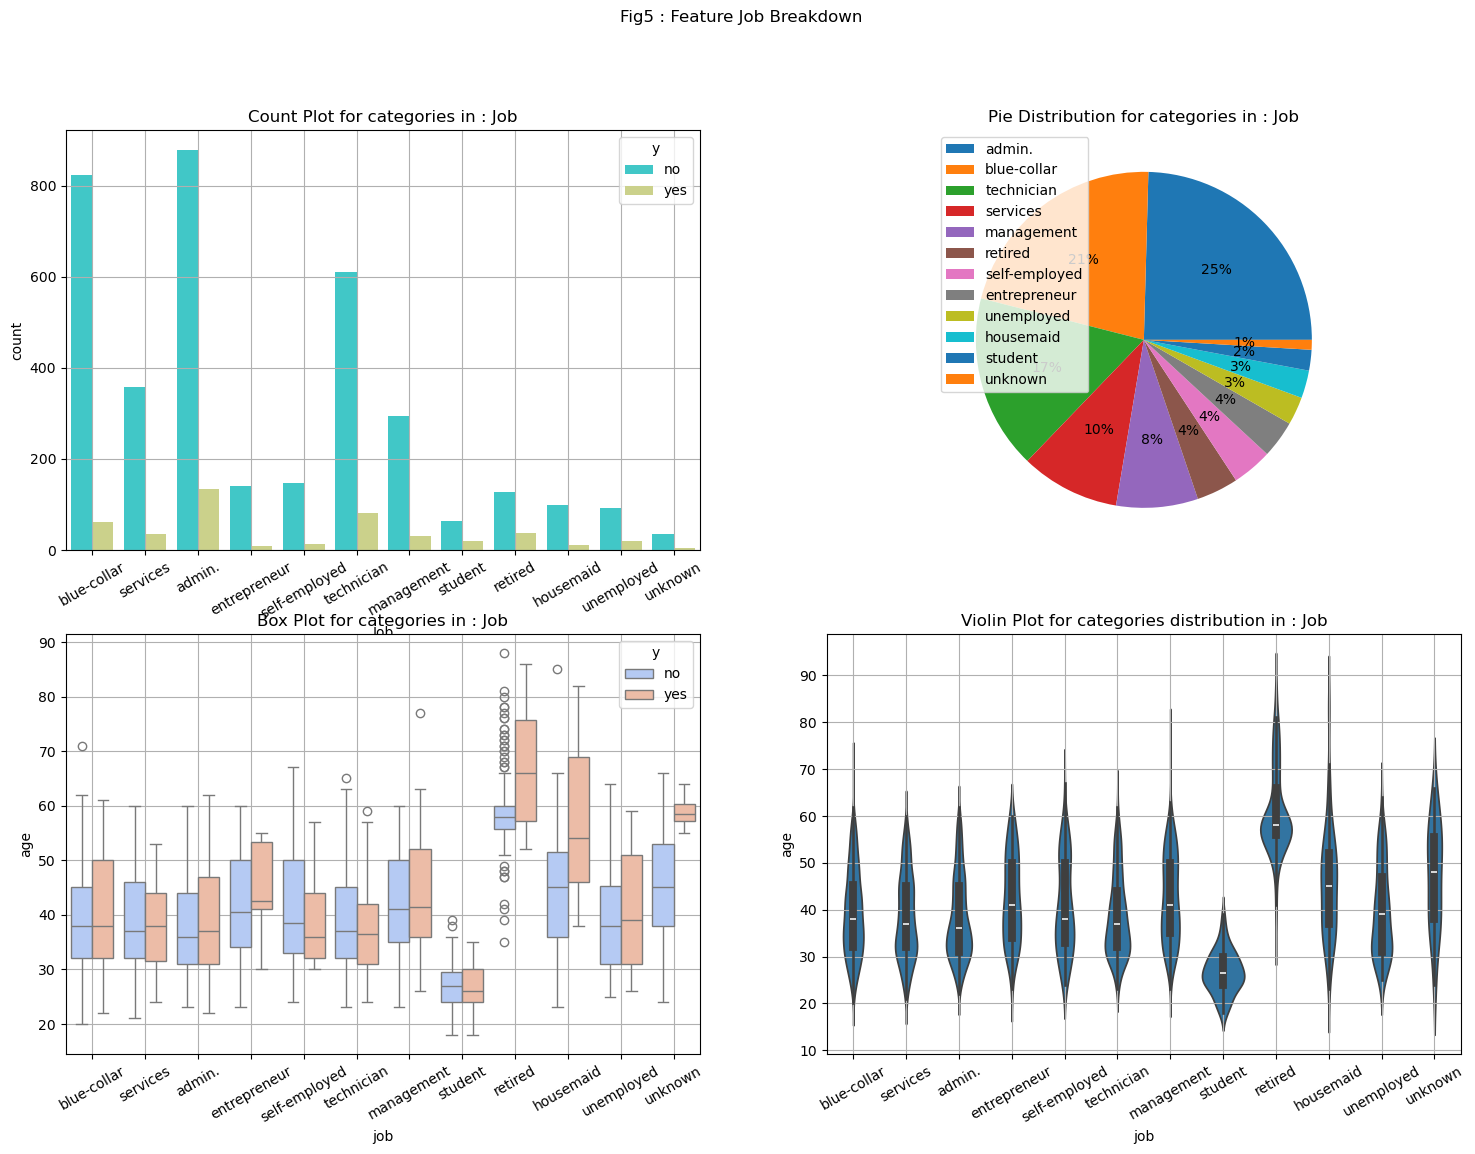

In [27]:
figcounter = generate_categorical_plots(df, df.job, df.y, df.age, 'Job', figcounter)

#### Feature 16-20
#### There are 5 numeric features, not sure how significant they are. 
* 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
* 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
* 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
* 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
* 20 - nr.employed: number of employees - quarterly indicator (numeric)

##### Let's try a simple plot and correlation matrix for eval
To see if we can find any correlation and then eliminate features with have 0.7 or higher correlation. If we find some features like that will perform feature selection to include in the model eval  


Text(0.5, 1.0, 'Correlation Heatmap for Features 16-20')

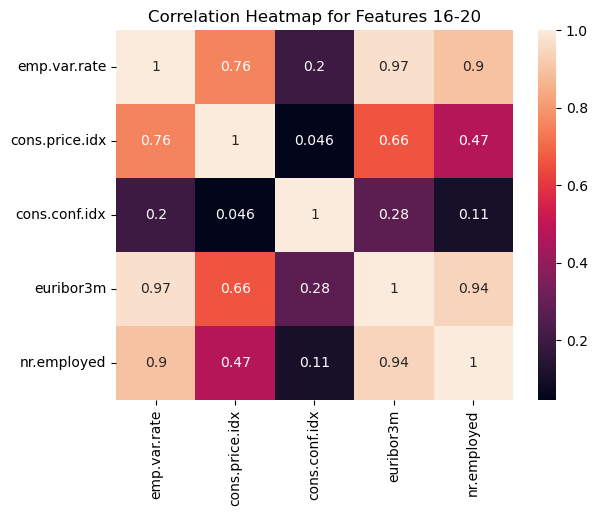

In [29]:
# scale data to oorrelate
encoded_y = df.y.replace({'yes':1, 'no': 0})
selected_cols = df[['emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m','nr.employed']]
scaled_df = pd.DataFrame(StandardScaler().fit_transform(selected_cols), columns=selected_cols.columns)
sns.heatmap(scaled_df.corr(), annot=True);
plt.title('Correlation Heatmap for Features 16-20')

##### Find that emp.var.rate has +ve correlation of 
* 0.78 with cons.price.idx 
* 0.97 with euribor3m 
* 0.91 with nr.employed

##### Perform feature selection to pick one of more features with `n_features_to_select='auto'`


In [31]:
# Basic feature selection
feature_sel_pipeline = Pipeline([
        ('selector', SequentialFeatureSelector(LinearRegression(fit_intercept=False), n_features_to_select='auto')),
        ('model', LinearRegression() )
])

feature_sel_pipeline.fit(scaled_df, encoded_y)
selected_features = feature_sel_pipeline.named_steps['selector'].get_feature_names_out()
print(selected_features)
features_to_drop = list(set(selected_cols) - set(selected_features))
features_to_drop

['cons.conf.idx' 'nr.employed']


['emp.var.rate', 'cons.price.idx', 'euribor3m']

##### From the column set 
* emp.var.rate
* cons.price.idx
* cons.conf.idx
* euribor3m
* nr.employed
##### The feature sections process selects 2 features
* cons.price.idx
* nr.employed

so will drop rest of the columns
* emp.var.rate
* euribor3m
* cons.conf.idx


In [33]:
df = df.drop(columns=features_to_drop, axis=1)

#### Feature 12: pdays feature needs some data engg
* We have numeric attribute named pdays means that number of days that passed by after the client was last contacted from a previous campaign (There are 999 and other numeric values inside of this column. 999 means client was not previously contacted. We converted the ‘pdays’ column numeric to categorical. If the value is equal to 999, we put the ‘0’ instead of ‘999’, otherwise we put 1. We dropped the regular ‘pdays’ column and set column name as ‘pdays_cat’


In [35]:
df['pdays_cat'] = [0 if value==999 else 1 for value in df.pdays]
df = df.drop(['pdays'], axis=1)

#### Feature 11: duration: For bencharking will include this, for predictions will drop this
last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known,

In [37]:
if prediction:
    df = df.drop(['duration'], axis=1)

#### We have 17 features now down from 21 

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            4119 non-null   int64  
 1   job            4119 non-null   object 
 2   marital        4119 non-null   object 
 3   education      4119 non-null   object 
 4   default        4119 non-null   object 
 5   housing        4119 non-null   object 
 6   loan           4119 non-null   object 
 7   contact        4119 non-null   object 
 8   month          4119 non-null   object 
 9   day_of_week    4119 non-null   object 
 10  duration       4119 non-null   int64  
 11  campaign       4119 non-null   int64  
 12  previous       4119 non-null   int64  
 13  poutcome       4119 non-null   object 
 14  cons.conf.idx  4119 non-null   float64
 15  nr.employed    4119 non-null   float64
 16  y              4119 non-null   object 
 17  pdays_cat      4119 non-null   int64  
dtypes: float

#### Target Feature
Let's plot and see if it is balanced or not 

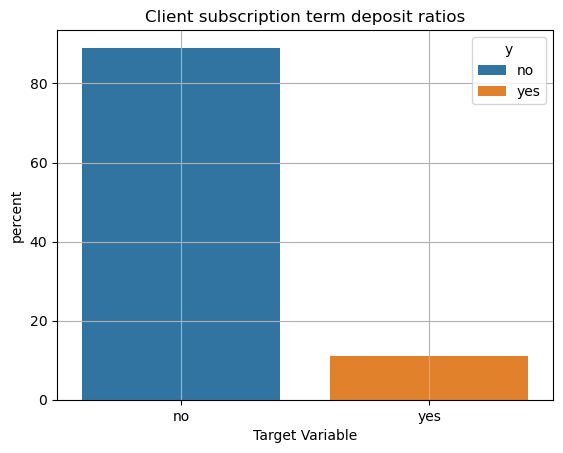

In [41]:
sns.countplot(x=df.y, hue=df.y, data=df, stat='percent', legend='full')
plt.title('Client subscription term deposit ratios')
plt.xlabel('Target Variable')
plt.grid()
plt.show();


#### ## The loan subscription ratio(target) is imbalanced
* The split ratio is 80% of NO to 20% Yes
* Since the cluster is imbalabced, 'accuracy' is not the correct metric for benchmarking, since it become easy to get a high accuracy score by simply classifying all observations as the majority class, which in this case is 0(No subscription of term deposit)
* To reduce Type-I/False Positive's we can choose  'precision' as the performance metric
* For Type-II we can choose 'recall'
* F1-score which is a harmonic mean of Precision and Recall, and gives a combined idea about these two metrics. But it comes with a caveat that interpretability sometimes is a challenge since it hard to determine that classifier is maximized for - precision or recall.

#### So will chose performance metric as 'f1' 
Will rerun and compare stats for 'recall' and 'precision' to compare FPR / TPR's. 


In [43]:
# Setting metric to f1
scoring_metric='f1' 

#### The performance metric is configured globally for the entire notebook. Global variable 'scoring_metric', it can be configured for other objective
     -  'f2' (chosen metric)
     -  'precision'
     -  'recall'
     -  'roc_auc'
     -  'accuracy'

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

#### Steps
* Prepare X, y dataset 
* Create X dataset, by dropping target feture 'y' from dataframe
* Use OnehotEncoder to encode/transform categorical features
* Check the encoder columns and shape of new dataset


In [47]:
# Here we start ...
X = df.drop(['y'], axis=1)
y = df['y']
y = df['y'].map({'yes': 1, 'no': 0})

# Let's test the water with OneHotEncoder

categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features
transformer_test = make_column_transformer(
        (OneHotEncoder(sparse_output=False), categorical_features ), remainder = 'passthrough')
transformer_test.fit(X)
log(transformer_test.get_feature_names_out(),2)
#print(len(transformer_test.get_feature_names_out()))
one_hot_df = pd.DataFrame(transformer_test.transform(X), columns=transformer_test.get_feature_names_out())
log(f'One hot encoded df shape={one_hot_df.shape}',2)

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([X, one_hot_df], axis=1)

# Drop the original categorical_features
df_encoded = df_encoded.drop(categorical_features, axis=1)
log(f'Final df shape={df_encoded.shape}',2)


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [49]:
# Basic train and test split of 70/30- Holdout cv
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [51]:
# For baseline will use the Dummy Classifier

dummy = DummyClassifier(random_state=42)
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Create a transformer for categorical dara
transformer_dummy = make_column_transformer(
        (OneHotEncoder(sparse_output=False), categorical_features ), remainder = 'passthrough')

# Use a Standscaler and print Test abd Train score
dummy.fit(StandardScaler().fit_transform(transformer_dummy.fit_transform(X_train)), y_train)
print('Train Accuracy Score=', dummy.score(X_train, y_train))
dummy.fit(StandardScaler().fit_transform(transformer_dummy.fit_transform(X_test)), y_test)
print('Test Accuracy Score ', dummy.score(X_test, y_test))


Train Accuracy Score= 0.8890045091918141
Test Accuracy Score  0.8940129449838188


In [52]:
### Functions for various operations

dummy_params = {}
knn_params = {}
lgr_params = {} 
svc_params = {}
tree_params = {}

### Functions for various operations
## PipelineFactory
## Initialize Global
## Convert captured stats into Dataframe
## Print metrics for pipeline/model
##    * Connfusion Matrix
##    * Classification Report
##    * ROC/AUC Curve


categorical_features_pipe = X.select_dtypes(include=['object']).columns.tolist()
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features_pipe),
    ], remainder='passthrough'
)


def pipeline_factory(transformer):
    dummy = Pipeline([
        ('transformer', transformer), 
        ('scaler', StandardScaler()), 
        ('classifier', DummyClassifier(random_state=42))
    ])

    knn = Pipeline([
        ('transformer', transformer), 
        ('scaler', StandardScaler()), 
        ('classifier', KNeighborsClassifier())
    ])

    lgr = Pipeline([
        ('transformer', transformer), 
        ('scaler', StandardScaler()), 
        ('classifier', LogisticRegression(max_iter=5000))
    ])

    tree = Pipeline([
        ('transformer', transformer), 
        ('scaler', StandardScaler()), 
        ('classifier', DecisionTreeClassifier(random_state=42))
    ])

    svc = Pipeline([
        ('transformer', transformer), 
        ('scaler', StandardScaler()), 
        ('classifier', SVC(random_state=42))
    ])
    return dummy, knn, lgr, tree, svc

train_scores=[]
test_scores=[]
max_depths = []
mean_fit_times = []
grid_names = []
best_params_arr = []
title_arr=[]
tpr_arr=[]
fpr_arr=[]

def init_globals():
    train_scores=[]
    test_scores=[]
    max_depths = []
    mean_fit_times = []
    grid_names = []
    best_params_arr = []
    return train_scores, test_scores, max_depths, mean_fit_times, grid_names, best_params_arr

def perform_test(grid, grid_name):
    print(f'=========== Executing - {grid_name} ================')
    grid.fit(X_train, y_train)
    train_acc = grid.score(X_train, y_train)
    test_acc = grid.score(X_test, y_test)
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    mean_fit_time = grid.cv_results_.get('mean_fit_time').mean()
    mean_fit_times.append(mean_fit_time)
    grid_names.append(grid_name)
    best_params_arr.append(grid.best_params_)
    print(f'Train Score={train_acc}, Test Score={test_acc}, Mean_fit_time={mean_fit_time}')
    print(grid.best_params_)
    print('==========================================')
    return grid


def dump_df():
    df = {}
    df['Model'] = grid_names
    df['Train Time'] = mean_fit_times
    df['Train Accuracy'] = train_scores
    df['Test Accuracy'] = test_scores
    df['Best Params'] = best_params_arr
    return pd.DataFrame.from_dict(df)

def dump_tpr_fpr():
    df = {}
    df['title'] = title_arr
    df['Total Positive Rate'] = tpr_arr
    df['False Positive Rate'] = fpr_arr
    return pd.DataFrame.from_dict(df)

def show_confusion_matrix(title, grid, X_test):
    y_preds = grid.predict(X_test)
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_preds)
    disp.figure_.suptitle(f"{title} - Confusion Matrix")

def getColumnNames(fromName, encoded_names):
    arr = []
    for i in range(0, fnames.size):
        arr.append(X_train.columns[int(fnames[i][1:])])
    return arr

def dump_hyper_params(hyper_params, best_model_params):
    for hp in hyper_params:
        print(f'{hp}={best_model_params.get(hp)}')
        return best_model_params.get(hp)

def show_model_stats(grid, title):
    y_preds = grid.predict(X_test)
    print_classification_report(grid, title, y_preds)
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].set_title(f"Confusion Matrix : {title}")
    ax[1].set_title(f'ROC Curve : {title}')
    ax[1].grid(visible=True)
    conf_display = show_confusion_matrix(grid, title, y_preds, ax[0])
    roc_display = show_roc_curve(grid, title, y_preds, ax[1])
    plt.show()
    print_fpr_tpr(title, y_test, y_preds)

#    show_precision_recall_curve(grid, title, y_preds)

def print_fpr_tpr(title, y_true, y_preds):
    cm = confusion_matrix(y_true, y_preds)
    tn, fp, fn, tp = cm.ravel()
    fpr = round((fp / (fp + tn) ) * 100, 2) 
    tpr = round((tp / (tp + fn) ) * 100, 2)
    title_arr.append(title)
    print(f'FPR={fpr}, TPR={tpr}') 
    tpr_arr.append(tpr)
    fpr_arr.append(fpr)

def show_confusion_matrix(grid, title,  y_preds, axs=None):
    disp = ConfusionMatrixDisplay.from_estimator(grid.best_estimator_, X_test, y_test, ax=axs)
    return disp

def print_classification_report(grid, title, y_preds):
    print(f"Classification Report - {title}")
    print(classification_report(y_test, y_preds))


def show_roc_curve(grid, title, y_preds, axs=None):
    disp = RocCurveDisplay.from_estimator(grid.best_estimator_, X_test, y_test,ax=axs);
    return disp

def show_precision_recall_curve(grid, title, y_preds, axs=None):
    disp = PrecisionRecallDisplay.from_estimator(grid.best_estimator_, X_test, y_test, ax=axs)
    disp.figure_.suptitle(f"Precision Recall Curve - {title} ")
    return disp

def find_best_pipe(best_model, knn, lgr, tree, svc):
    if best_model == 'kNN':
        return knn
    elif best_model == 'Logistic Regression':
        return lgr
    elif best_model == 'DecisionTree':
        return tree
    else:
        return svc


def cust_bar_plot(df,title,figcounter, imgName):
    new_title, figcounter = getFigTitle(figcounter, title)
    ax = df.round(2).plot(kind='bar',rot=True, title=new_title, grid=True, figsize=(10,6))
    for container in ax.containers:
        ax.bar_label(container)
    ax.get_figure().savefig(images_path + imgName)
    return figcounter
'''
def get_custom_scorer(scoring_metric):
    if scoring_metric == 'accuracy':
        return make_scorer(accuracy_score, greater_is_better=True,  pos_label=1)
    elif scoring_metric == 'precision':
        return make_scorer(precision_score, greater_is_better=True,  pos_label=1)
    elif scoring_metric == 'recall':
        return make_scorer(recall_score, greater_is_better=True,  pos_label=1)
    elif scoring_metric == 'f1':
        return make_scorer(f1_score, greater_is_better=True,  pos_label=1)
    elif scoring_metric == 'roc_auc':
        return make_scorer(roc_auc_score, greater_is_better=True)
    else:
        return make_scorer(accuracy_score, greater_is_better=True,  pos_label=1)
'''
def get_custom_scorer(scoring_metric):
    if scoring_metric == 'accuracy':
        return make_scorer(accuracy_score, greater_is_better=True)
    elif scoring_metric == 'precision':
        return make_scorer(precision_score, greater_is_better=True)
    elif scoring_metric == 'recall':
        return make_scorer(recall_score, greater_is_better=True)
    elif scoring_metric == 'f1':
        return make_scorer(f1_score, greater_is_better=True)
    elif scoring_metric == 'roc_auc':
        return make_scorer(roc_auc_score, greater_is_better=True)
    else:
        return make_scorer(accuracy_score, greater_is_better=True)

def select_top_classifier(dataset):
    best_model = dataset.sort_values('Test Accuracy', ascending=False).index[0]
    return best_model

=========== Executing - Dummy ================
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train Score=0.0, Test Score=0.0, Mean_fit_time=0.012325143814086914
{}
Classification Report - Dummy
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1105
           1       0.00      0.00      0.00       131

    accuracy                           0.89      1236
   macro avg       0.45      0.50      0.47      1236
weighted avg       0.80      0.89      0.84      1236



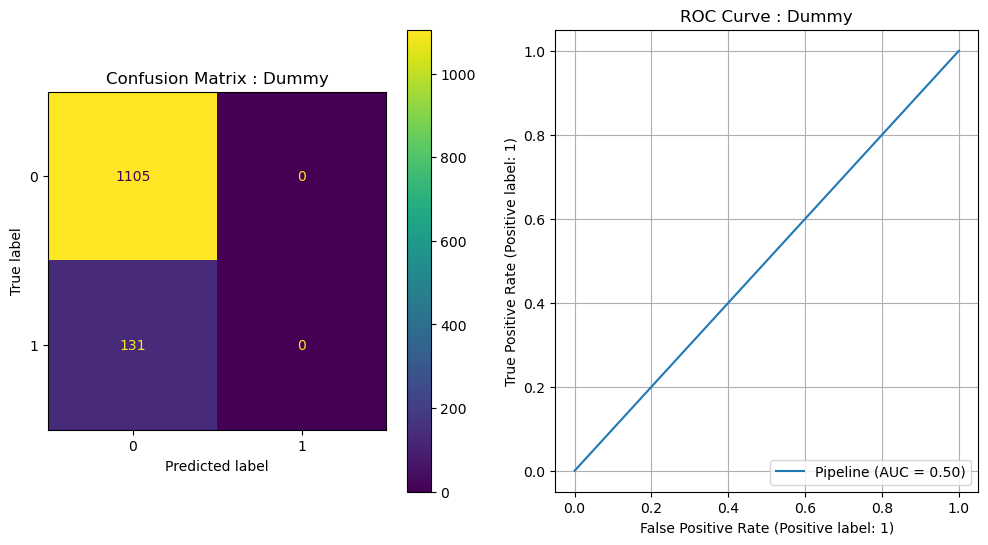

FPR=0.0, TPR=0.0


In [53]:
# Now we have some results for 'accuracy' metric. The tests the transformer/encoding and scaler. 
# Now let's run in the Pipeline and print stats

dummy_pipe, knn_pipe, lgr_pipe, tree_pipe, svc_pipe = pipeline_factory(preprocessor)
dummy_pipe = perform_test(GridSearchCV(dummy_pipe, param_grid=dummy_params, scoring=scoring_metric, 
                                       verbose=globalloglevel, error_score='raise'),  'Dummy')
show_model_stats(dummy_pipe, 'Dummy')

#### Observation for Baseline/Dummy Model
* No Score for expected target "1/Yes" is zero, since dummy does not make any predictions 
* Baseline ROC Curve 


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [56]:
# Run the Logistic Regression Simple Model
lgr_pipe = perform_test(GridSearchCV(lgr_pipe, param_grid=lgr_params, scoring=get_custom_scorer(scoring_metric),
                                     verbose=globalloglevel),  'Logistic Regression')

=========== Executing - Logistic Regression ================
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train Score=0.583804143126177, Test Score=0.4957264957264957, Mean_fit_time=0.020429515838623048
{}


In [57]:
# Let's see all the stats
#show_model_stats(lgr_pipe, 'Logistic Regression')

### Problem 9: Score the Model

What is the accuracy of your model?

#### Observation for Simple Model
* The default scores for 
* Train = 0.7345971563981043
* Test = 0.5631067961165048

Not very high scores, something for us to tune.
  

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

#### Approach - Run various pipelines for different type of classifiers to performs score evaluation. 
Using GridSearch for each pipeline, even if the params are empty. Will run the following pipelines
* KNeighborsClassifier(kNN)
* LogisiticRegression
* DecisionTreeClassifier
* Support Vector Machine(SVM)

The results will be captured in a DataFrame   


In [62]:
# Initialize and reset global variables
train_scores, test_scores, max_depths, mean_fit_times, grid_names, best_params_arr = init_globals()

# Create all the pipelines using a factory methog
dummy_pipe, knn_pipe, lgr_pipe, tree_pipe, svc_pipe = pipeline_factory(preprocessor)

In [63]:
knn_pipe = perform_test(GridSearchCV(knn_pipe, param_grid=knn_params, 
                                     scoring=get_custom_scorer(scoring_metric), verbose=globalloglevel, error_score='raise'),  'kNN')
lgr_pipe = perform_test(GridSearchCV(lgr_pipe, param_grid=lgr_params, 
                                     scoring=get_custom_scorer(scoring_metric), verbose=globalloglevel),  'Logistic Regression')
tree_pipe = perform_test(GridSearchCV(tree_pipe, param_grid=tree_params, 
                                      scoring=get_custom_scorer(scoring_metric), verbose=globalloglevel),  'DecisionTree')
svc_pipe = perform_test(GridSearchCV(svc_pipe, param_grid=svc_params, 
                                     scoring=get_custom_scorer(scoring_metric), verbose=globalloglevel),  'SVM')

# Dump the model metrics
results_df = dump_df()
results_df = results_df.set_index('Model')
results_df.drop('Best Params', axis=1)

=========== Executing - kNN ================
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train Score=0.4872881355932204, Test Score=0.3111111111111111, Mean_fit_time=0.014468145370483399
{}
=========== Executing - Logistic Regression ================
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train Score=0.583804143126177, Test Score=0.4957264957264957, Mean_fit_time=0.025682783126831053
{}
=========== Executing - DecisionTree ================
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train Score=1.0, Test Score=0.4609929078014184, Mean_fit_time=0.018316173553466798
{}
=========== Executing - SVM ================
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train Score=0.6929133858267718, Test Score=0.3814432989690722, Mean_fit_time=0.08172135353088379
{}


,Train Time,Train Accuracy,Test Accuracy
Model,,,
kNN,0.014468,0.487288,0.311111
Logistic Regression,0.025683,0.583804,0.495726
DecisionTree,0.018316,1.000000,0.460993
SVM,0.081721,0.692913,0.381443


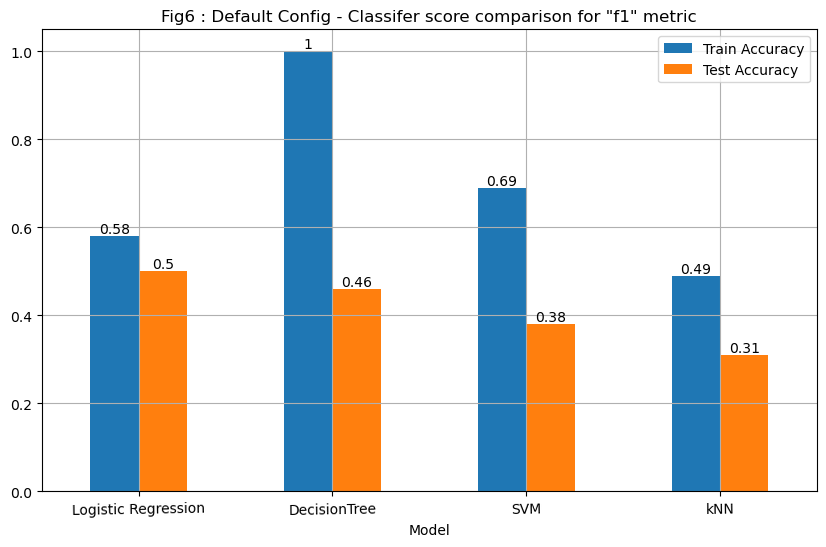

In [64]:
# Lets plot to see the scores. The results are sorted by Test Scores.
figcounter = cust_bar_plot(results_df[['Train Accuracy', 'Test Accuracy']].sort_values(
    'Test Accuracy', ascending=False), f'Default Config - Classifer score comparison for "{scoring_metric}" metric', 
              figcounter, 'model_tuned_comparison.png')

In [65]:
## Use the data to find Best classifier from the current run

before_tuning_best_model = select_top_classifier(results_df)
print(f'Best Model before tuning = {before_tuning_best_model}')

Best Model before tuning = Logistic Regression


#### Observation for Classifiers comparison
* Logistic Regression is the best classifier with test score as 50%, Followed by DecisionTree - 46% and SVM - 38%
* Decision Tree has a train score as 100% and Test score is 46%, explain tha model is overfitted

Test scores are better let's see we can improvve it 


Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1105
           1       0.59      0.28      0.38       131

    accuracy                           0.90      1236
   macro avg       0.75      0.63      0.66      1236
weighted avg       0.88      0.90      0.89      1236



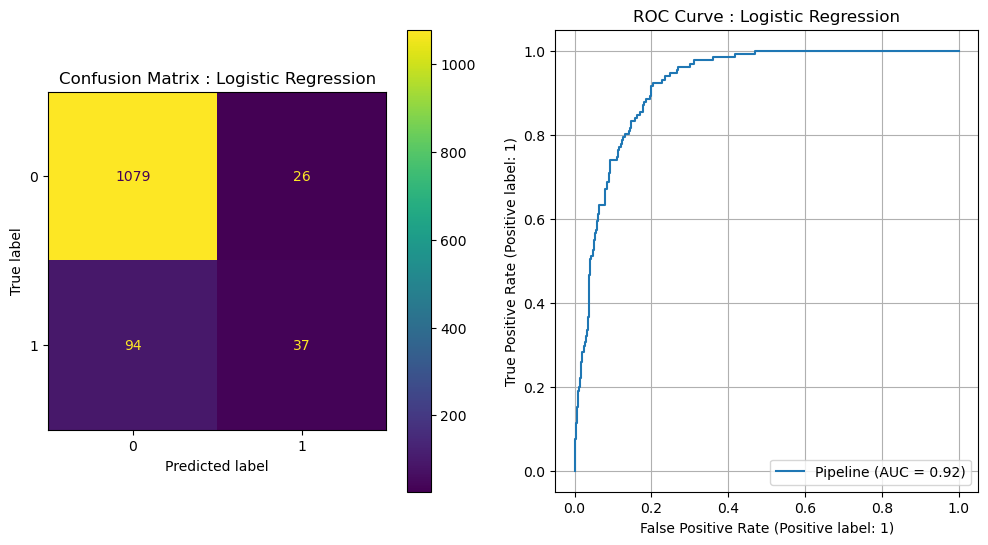

FPR=2.35, TPR=28.24


In [67]:
#Let's also check the stats for the best_model, since it has the highest, train and test score
show_model_stats(svc_pipe, before_tuning_best_model)

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### Improving the model
 - Gender is not included in the dataset. So cannot do any feature engg
 - Hyperparameter for all classifiers are defined below

In [70]:
### Hyperparameters for tunning the various classifiers

## SVM Parameters
svc_params = {
        'classifier__C': [0.001, 0.01, 0.1, 1, 5], 
        'classifier__kernel': ['linear', 'poly', 'rbf' ], 
        'classifier__gamma': ['scale', 'auto'],
        'classifier__class_weight': ['balanced', None],
        }

## KNN Parameters
knn_params = {
        'classifier__n_neighbors' : range(2, round(df_encoded.shape[1]/2), 2),
        'classifier__weights' :['uniform', 'distance']    
        }

## LogisticRegression Parameters
lgr_params = {
        'classifier__penalty': ['l1', 'l2'],
        'classifier__C' : np.logspace(-5, .5,10),
        'classifier__solver': ['liblinear']
        } 

## Decision ree Parameters
tree_params = {
        'classifier__max_depth': [2, 5, 7, 10],
        'classifier__min_samples_split': [0.1, 0.2],
        'classifier__min_samples_leaf': [1,2,3],
        'classifier__criterion' : ['gini', 'entropy'],
        'classifier__ccp_alpha': [0.001, 0.010, 0.020],
        'classifier__min_impurity_decrease': [0.01, 0.02, 0.03],
        }


In [71]:
### Noe the parameters are set, let run the pipeliens again and see who wins the race :)

train_scores, test_scores, max_depths, mean_fit_times, grid_names, best_params_arr = init_globals()
_, knn_pipe, lgr_pipe, tree_pipe, svc_pipe = pipeline_factory(preprocessor)
knn_pipe = perform_test(GridSearchCV(knn_pipe, param_grid=knn_params, 
                                     scoring=get_custom_scorer(scoring_metric), verbose=globalloglevel, error_score='raise'),  'kNN')
lgr_pipe = perform_test(GridSearchCV(lgr_pipe, param_grid=lgr_params, 
                                     scoring=get_custom_scorer(scoring_metric), verbose=globalloglevel),  'Logistic Regression')
tree_pipe = perform_test(GridSearchCV(tree_pipe, param_grid=tree_params, 
                                      scoring=get_custom_scorer(scoring_metric), verbose=globalloglevel),  'DecisionTree')
svc_pipe = perform_test(GridSearchCV(svc_pipe, param_grid=svc_params, 
                                     scoring=get_custom_scorer(scoring_metric), verbose=globalloglevel),  'SVM')
# Dump the results of tuned classifier comparison
results_df_tuned = dump_df()
results_df_tuned = results_df_tuned.set_index('Model')
results_df_tuned.drop('Best Params', axis=1)

=========== Executing - kNN ================
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Train Score=1.0, Test Score=0.33476394849785407, Mean_fit_time=0.014258235692977905
{'classifier__n_neighbors': 2, 'classifier__weights': 'distance'}
=========== Executing - Logistic Regression ================
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Train Score=0.5784499054820416, Test Score=0.49565217391304345, Mean_fit_time=0.018507091999053954
{'classifier__C': 0.7742636826811278, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
=========== Executing - DecisionTree ================
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Train Score=0.6390685640362226, Test Score=0.5558739255014327, Mean_fit_time=0.014150865100048206
{'classifier__ccp_alpha': 0.001, 'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_impurity_decrease': 0.01, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split'

,Train Time,Train Accuracy,Test Accuracy
Model,,,
kNN,0.014258,1.000000,0.334764
Logistic Regression,0.018507,0.578450,0.495652
DecisionTree,0.014151,0.639069,0.555874
SVM,0.139471,0.610169,0.566234


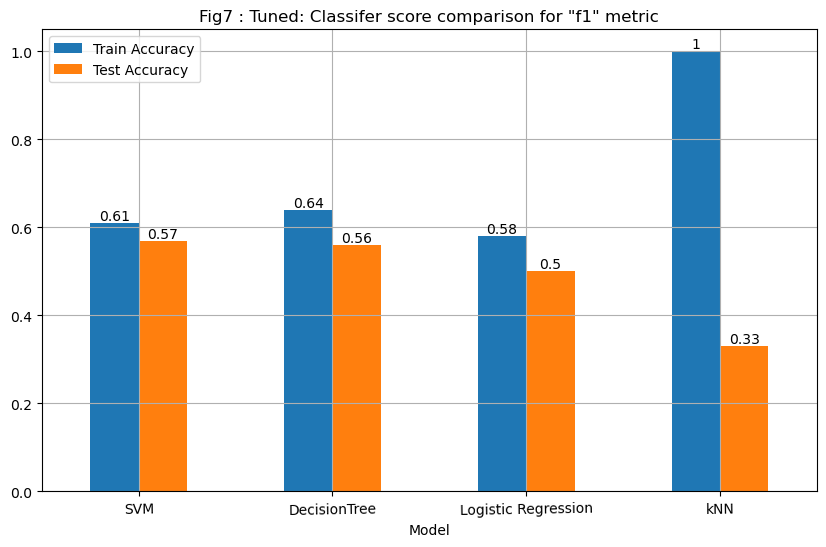

In [72]:
# Lets plot the resuts, sorted the test scores 
figcounter = cust_bar_plot(results_df_tuned[['Train Accuracy', 'Test Accuracy']].sort_values(
    'Test Accuracy', ascending=False), f'Tuned: Classifer score comparison for "{scoring_metric}" metric', 
              figcounter, f'classifiers_tuned_{scoring_metric}_comparison.png')

In [73]:
# Use the data to best classifier and run some stats a
after_tuning_best_model = select_top_classifier(results_df_tuned)
print(f'Best Model After tuning = {after_tuning_best_model}')

Best Model After tuning = SVM


#### Observation for Tuned classifiers comparison
* Tuning definately has helped in improving the test score SVM from 38% to 57%
* DecisionTree is not overfitted, improved from 46-56%
* LogisticRegression score has not changed at all
* kNN(K-nearest neighbour) is overfitted  


In [75]:
# Dump the best estimator so far
best_pipe = find_best_pipe(after_tuning_best_model, knn_pipe, lgr_pipe, tree_pipe, svc_pipe)
print(best_pipe.best_estimator_)
best_pipe.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('scaler', StandardScaler()),
                ('classifier',
                 SVC(

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('scaler', StandardScaler()),
                ('classifier',
                 SVC(C=0.001, class_weight='balanced', kernel='linear',
                     random_state=42))])

Classification Report - SVM(Tuned) -f1
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1105
           1       0.43      0.83      0.57       131

    accuracy                           0.86      1236
   macro avg       0.70      0.85      0.74      1236
weighted avg       0.92      0.86      0.88      1236



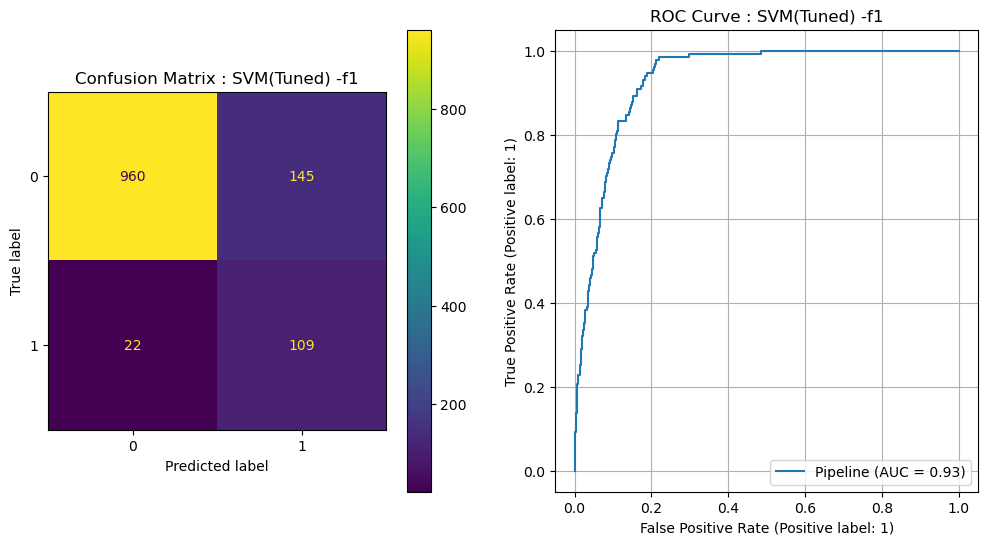

FPR=13.12, TPR=83.21


In [76]:
# Lets see classifier stats
show_model_stats(best_pipe, f'{after_tuning_best_model}(Tuned) -{scoring_metric}')

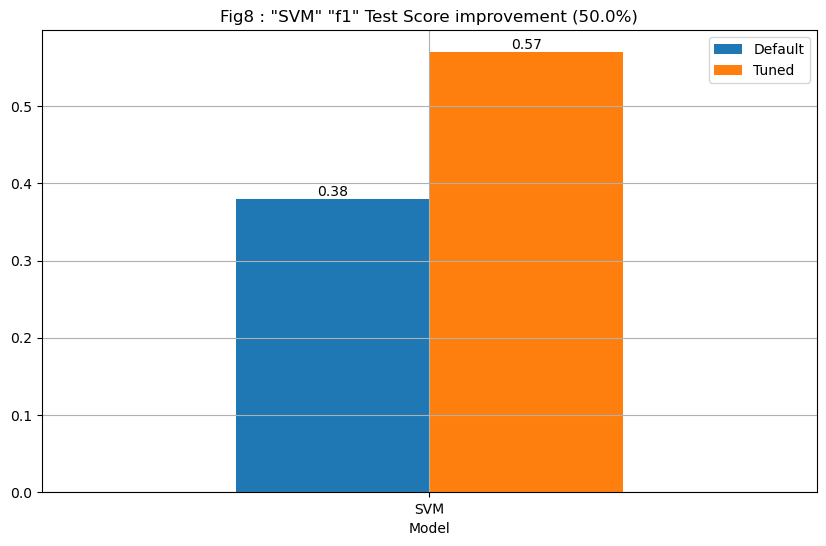

In [77]:
# Calculate the % improvement

tuned_acc = round(results_df_tuned.loc[after_tuning_best_model]['Test Accuracy'],2)
default_acc = round(results_df.loc[after_tuning_best_model]['Test Accuracy'],2)
improvement_percent = ((tuned_acc - default_acc)/default_acc)*100
#print(f'Percent Improvement in {scoring_metric} for model={after_tuning_best_model} = ',  round(improvement_percent,2))

#Improvement plot
final_df = pd.DataFrame.from_dict({'Default' : [default_acc], 
                        'Tuned' : [tuned_acc], 'Model' :[after_tuning_best_model]}).set_index('Model')
figcounter = cust_bar_plot(final_df,
                           f'"{after_tuning_best_model}" "{scoring_metric}" Test Score improvement ({round(improvement_percent,2)}%)', 
              figcounter, 'tuned_comparison.png')

### Now we have the data for 'f1-score' metric, let's re-run all the pipelines for 'recall' and 'precision'. 
Will compare the TPR/FPR in the end

In [79]:
# Set metric as recall, maybe a function would be better here :)
scoring_metric='recall'

train_scores, test_scores, max_depths, mean_fit_times, grid_names, best_params_arr = init_globals()
_, knn_pipe, lgr_pipe, tree_pipe, svc_pipe = pipeline_factory(preprocessor)
knn_pipe = perform_test(GridSearchCV(knn_pipe, param_grid=knn_params, 
                                     scoring=get_custom_scorer(scoring_metric), verbose=globalloglevel, error_score='raise'),  'kNN')
lgr_pipe = perform_test(GridSearchCV(lgr_pipe, param_grid=lgr_params, 
                                     scoring=get_custom_scorer(scoring_metric), verbose=globalloglevel),  'Logistic Regression')
tree_pipe = perform_test(GridSearchCV(tree_pipe, param_grid=tree_params, 
                                      scoring=get_custom_scorer(scoring_metric), verbose=globalloglevel),  'DecisionTree')
svc_pipe = perform_test(GridSearchCV(svc_pipe, param_grid=svc_params, 
                                     scoring=get_custom_scorer(scoring_metric), verbose=globalloglevel),  'SVM')
# Dump the results of tuned classifier comparison
results_df_roc_auc_tuned = dump_df()
results_df_roc_auc_tuned = results_df_roc_auc_tuned.set_index('Model')
results_df_roc_auc_tuned.drop('Best Params', axis=1)

=========== Executing - kNN ================
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Train Score=1.0, Test Score=0.29770992366412213, Mean_fit_time=0.013880054652690887
{'classifier__n_neighbors': 2, 'classifier__weights': 'distance'}
=========== Executing - Logistic Regression ================
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Train Score=0.5125, Test Score=0.5114503816793893, Mean_fit_time=0.01882714033126831
{'classifier__C': 1e-05, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
=========== Executing - DecisionTree ================
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Train Score=0.771875, Test Score=0.7404580152671756, Mean_fit_time=0.016402388060534442
{'classifier__ccp_alpha': 0.001, 'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_impurity_decrease': 0.01, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 0.1}
=========== Executing - SVM ==

,Train Time,Train Accuracy,Test Accuracy
Model,,,
kNN,0.013880,1.000000,0.297710
Logistic Regression,0.018827,0.512500,0.511450
DecisionTree,0.016402,0.771875,0.740458
SVM,0.141544,0.903125,0.885496


Best Model After tuning = SVM


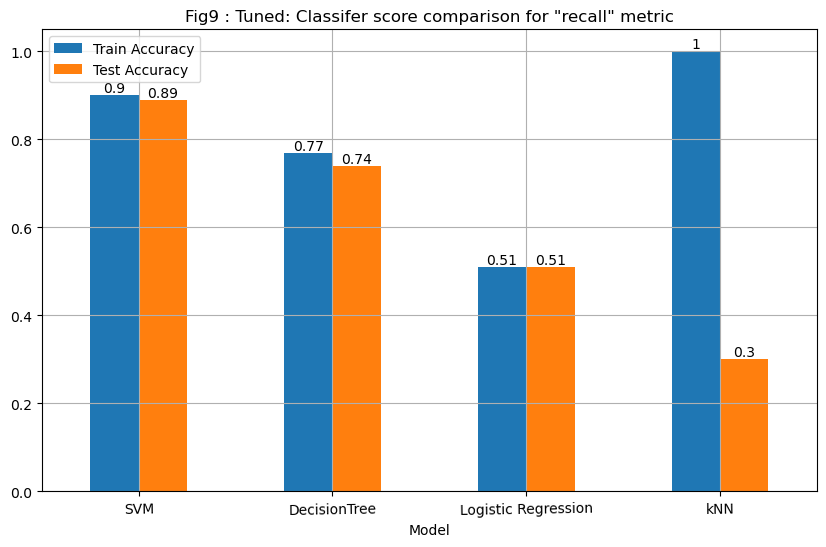

In [80]:
# Lets plot the resuts, sorted the test scores 
figcounter = cust_bar_plot(results_df_roc_auc_tuned[['Train Accuracy', 'Test Accuracy']].sort_values(
    'Test Accuracy', ascending=False), f'Tuned: Classifer score comparison for "{scoring_metric}" metric', 
              figcounter, f'model_tuned_{scoring_metric}_comparison.png')
# Lets select the best classifier and run some stats a
roc_auc_best_model = select_top_classifier(results_df_roc_auc_tuned)
print(f'Best Model After tuning = {roc_auc_best_model}')


Classification Report - SVM "recall" 
              precision    recall  f1-score   support

           0       0.98      0.84      0.91      1105
           1       0.40      0.89      0.55       131

    accuracy                           0.84      1236
   macro avg       0.69      0.86      0.73      1236
weighted avg       0.92      0.84      0.87      1236



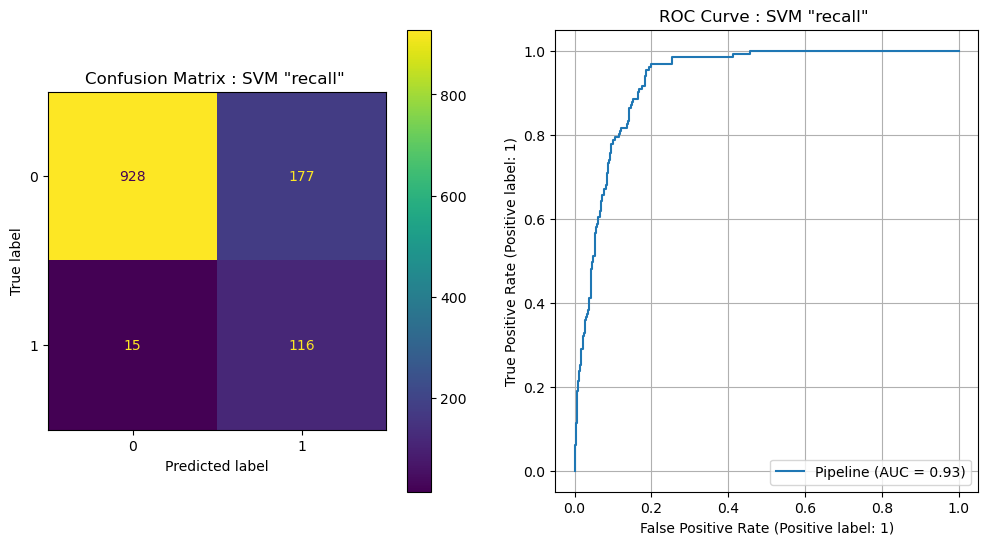

FPR=16.02, TPR=88.55


In [81]:
# Lets dump classifier stats
show_model_stats(find_best_pipe(roc_auc_best_model, knn_pipe, lgr_pipe, tree_pipe, svc_pipe)
                 , f'{roc_auc_best_model} "{scoring_metric}" ')

In [82]:
# Now to precision

scoring_metric='precision'

train_scores, test_scores, max_depths, mean_fit_times, grid_names, best_params_arr = init_globals()
_, knn_pipe, lgr_pipe, tree_pipe, svc_pipe = pipeline_factory(preprocessor)
knn_pipe = perform_test(GridSearchCV(knn_pipe, param_grid=knn_params, 
                                     scoring=get_custom_scorer(scoring_metric), verbose=globalloglevel, error_score='raise'),  'kNN')
lgr_pipe = perform_test(GridSearchCV(lgr_pipe, param_grid=lgr_params, 
                                     scoring=get_custom_scorer(scoring_metric), verbose=globalloglevel),  'Logistic Regression')
tree_pipe = perform_test(GridSearchCV(tree_pipe, param_grid=tree_params, 
                                      scoring=get_custom_scorer(scoring_metric), verbose=globalloglevel),  'DecisionTree')
svc_pipe = perform_test(GridSearchCV(svc_pipe, param_grid=svc_params, 
                                     scoring=get_custom_scorer(scoring_metric), verbose=globalloglevel),  'SVM')
# Dump the results of tuned classifier comparison
results_df_f1_tuned = dump_df()
results_df_f1_tuned = results_df_f1_tuned.set_index('Model')
results_df_f1_tuned.drop('Best Params', axis=1)

=========== Executing - kNN ================
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Train Score=0.6595744680851063, Test Score=0.71875, Mean_fit_time=0.014832042157649994
{'classifier__n_neighbors': 32, 'classifier__weights': 'uniform'}
=========== Executing - Logistic Regression ================
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Train Score=0.7310924369747899, Test Score=0.6909090909090909, Mean_fit_time=0.03294716358184814
{'classifier__C': 0.011364636663857255, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
=========== Executing - DecisionTree ================
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Train Score=0.6008583690987125, Test Score=0.57, Mean_fit_time=0.016337982372001365
{'classifier__ccp_alpha': 0.001, 'classifier__criterion': 'entropy', 'classifier__max_depth': 2, 'classifier__min_impurity_decrease': 0.01, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 0.1}
=

,Train Time,Train Accuracy,Test Accuracy
Model,,,
kNN,0.014832,0.659574,0.718750
Logistic Regression,0.032947,0.731092,0.690909
DecisionTree,0.016338,0.600858,0.570000
SVM,0.186786,0.945946,0.909091


Best Model for precision score = SVM


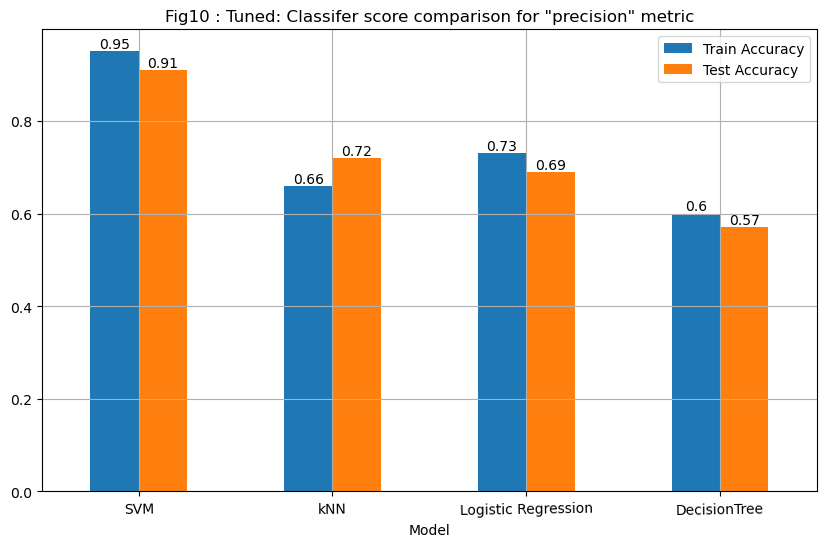

In [83]:
# Lets plot the resuts, sorted the test scores 
figcounter = cust_bar_plot(results_df_f1_tuned[['Train Accuracy', 'Test Accuracy']].sort_values(
    'Test Accuracy', ascending=False), f'Tuned: Classifer score comparison for "{scoring_metric}" metric', 
              figcounter, f'model_tuned_{scoring_metric}_score_comparison.png')
f1_best_model = select_top_classifier(results_df_f1_tuned)
print(f'Best Model for {scoring_metric} score = {f1_best_model}')


Classification Report - SVM - "precision"
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1105
           1       0.91      0.08      0.14       131

    accuracy                           0.90      1236
   macro avg       0.91      0.54      0.54      1236
weighted avg       0.90      0.90      0.86      1236



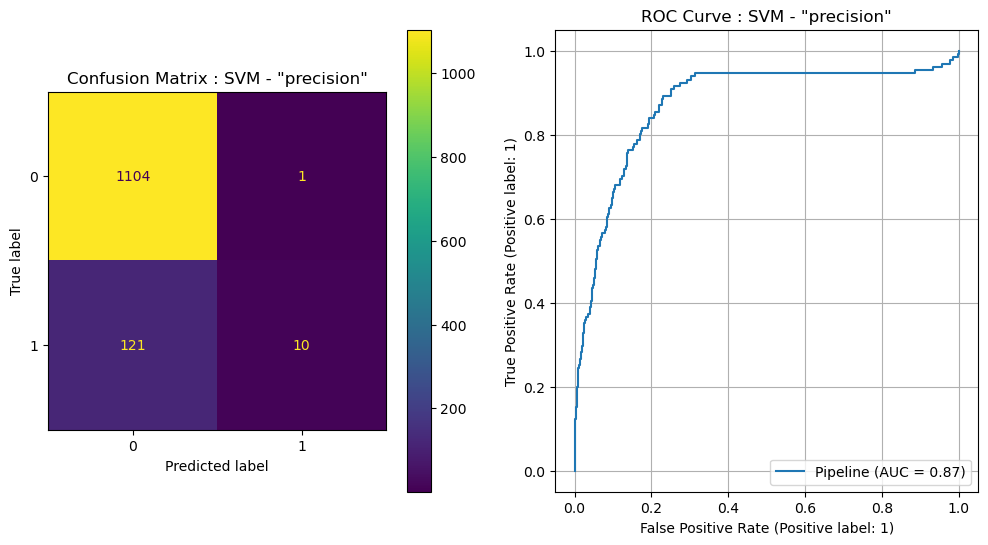

FPR=0.09, TPR=7.63


In [84]:
# Select the best classifier and stats
best_pipe = find_best_pipe(f1_best_model, knn_pipe, lgr_pipe, tree_pipe, svc_pipe)
show_model_stats(best_pipe, f'{f1_best_model} - "{scoring_metric}"')

In [85]:
# Dump all stats and see
dump_tpr_fpr()

,title,Total Positive Rate,False Positive Rate
0,Dummy,0.00,0.00
1,Logistic Regression,28.24,2.35
2,SVM(Tuned) -f1,83.21,13.12
3,"SVM ""recall""",88.55,16.02
4,"SVM - ""precision""",7.63,0.09


#### Observations
* For 'precision' we can certainly see that False positive Rate has gone down, but positive rate is also not high, with a high AUC=0.92
* SVM with 'f1' metric seems to be the best, since it has balance between FPR(lower) and TPR(higher) ad with AUC = 0.93

#### Questions
- Should we try to rerun by synthetically balancing the target's minority/positive class? SMOTE will balance the ratios
- Any other encoder like 'TargetEncoder' to see the difference and performance of the classifiers?
- Had seen a major difference in overall results if we set
    - prediction = True, which drop Feature 11 - duration.
    - Is some target data leaking happening when it is included ?